<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction

The common expression for replacing explicit loops with array expressions is commonly referred to as <i> vectorization. </i> In general, python vectorized operations will often be one or two orders of magnitude faster than their pure python equivalents.

As a simple example, suppose we want to compute $z=\sqrt{x^2 +y^2}$ across a regular grid of values. The np.meshgrid function takes two 1D arrays and returns two 2D matrices corresponding to all the pairs of (x, y) in the two arrays:

In [3]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)

Now we can compute the value of $z$ across the grid:

In [9]:
zs = np.sqrt(xs**2+ys**2)
zs

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

Lets create a visualization <i> of the array </i> using matplotlib:

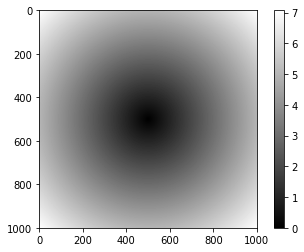

In [10]:
plt.imshow(zs, cmap=plt.cm.gray); plt.colorbar()
plt.show()

This maps out the array; not the contour plot which is shown below:

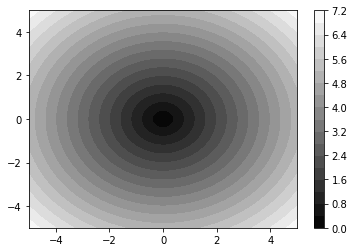

In [19]:
plt.contourf(xs, ys, np.sqrt(xs**2+ys**2), 20, cmap=plt.cm.gray); plt.colorbar()
plt.show()

# Expressing Conditional Logic as Array Operations

## The numpy.where() function

This is where vectorized notation becomes extremely useful and speeds up computation processes by orders of magnitude. 

Suppose we have two arrays, x and y, and a logical condition array. Suppose we want to take the value in x if the logic array is true and y otherwise. Hardcoded, this would look like this:

In [22]:
x_arr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y_arr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
logic_arr = [True, False, True, True, True]

result = [(x if c else y) for (x, y, c) in zip(x_arr, y_arr, logic_arr)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 1.5]

This operation is bad for multiple reasons. Firstly it is not fast for large arrays (all the work is being done in the interpretted python code). Secondly, it does't work for multidimensional arrays.

The 'numpy.where' function gets around this:

In [23]:
np.where(logic_arr, x_arr, y_arr)

array([ 1.1,  2.2,  1.3,  1.4,  1.5])

The second and third arguments don't need to be arrays; they can also be scalars.

In [24]:
np.where(logic_arr, 1, 0)

array([1, 0, 1, 1, 1])

## Using the numpy.where() Function for Multidimensional Arrays

Suppose we generate an array of random values and we want to replace all the positive values with 2 and all the negative values with -2. That task can be accomplished as such:

In [25]:
arr=np.random.randn(4,4)

np.where(arr > 0, 2, -2)

array([[-2, -2, -2, -2],
       [ 2,  2, -2,  2],
       [-2, -2, -2, -2],
       [-2,  2,  2, -2]])

Maybe we only want to set the positive values to 2 and leave the negative values as is. For this, we simply put

In [26]:
np.where(arr > 0, 2, arr)

array([[-1.15510372, -0.11350281, -2.86889573, -1.53008866],
       [ 2.        ,  2.        , -0.44298618,  2.        ],
       [-1.3088984 , -1.86790419, -0.51733743, -2.29391859],
       [-0.51954329,  2.        ,  2.        , -0.52059729]])

The last argument 'arr' tells the function that where the logical condition isn't true, leave the array as is.

# Mathematical and Statistical Methods

## Operations Across Columns and Rows

A set of functions that compute statistics about an entire array or along its axes are accessible as methods of the array class.

In [27]:
arr = np.random.randn(5,4)
arr

array([[ 2.27875203,  0.55908222, -1.15416693, -0.35170972],
       [ 0.71971218,  0.41673629, -1.01383459, -1.15827976],
       [-0.99435714,  1.43362721, -1.11078581,  1.29128574],
       [-0.47915822, -0.32523819,  0.19283097,  0.14041619],
       [-0.31445045, -0.97885446,  1.39959584,  0.15222086]])

In [29]:
np.mean(arr)
arr.mean() #equivalent

0.035171213663824932

The methods are particularily useful in that we can choose the axis we like.

In [32]:
arr.mean(axis=1) #across the columns

array([ 0.3329894 , -0.25891647,  0.1549425 , -0.11778731,  0.06462795])

In [34]:
arr.sum(axis=0) #down the rows

array([ 1.21049841,  1.10535307, -1.68636051,  0.07393331])

## Functions the Aggregate

Functions like cumsum() and cumprod() do not aggregrate, they instead return an array of the same size.

In [35]:
arr = np.array([1,3,4,6,7,8])
arr.cumsum()

array([ 1,  4,  8, 14, 21, 29])

In multidimensional arrays, accumulation functions return an array of the same size as well, but the partial aggregrates are computed along a specific axis.

In [37]:
arr = np.arange(9).reshape((3,3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [38]:
arr.cumsum(axis=0) #down the rows

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [39]:
arr.cumsum(axis=1) #across the columns

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

# Methods for Boolean Arrays

## Counting Occurences of a Logical Statement in an Array

Boolean values are coerced to 1 if True and 0 if False. Sum can thus be used to count True values in a boolean array:

In [40]:
arr=np.random.randn(100)
(arr>0).sum()

49

We can also use 'any' and 'all' to check for boolean values in an array:

In [41]:
bools = np.array([False, False, True, False])

print(bools.any())
print(bools.all())

True
False


# Sorting

## Sorting 1D

NumPy arrays can be sorted in-place using the sort method.

In [43]:
arr = np.random.randn(5)
arr

array([ 0.77136532, -0.94246812,  0.25230917, -0.62054798, -2.3599155 ])

In [44]:
arr.sort()
arr

array([-2.3599155 , -0.94246812, -0.62054798,  0.25230917,  0.77136532])

## Sorting Higher Dimensional

Like before, we must choose an axis to sort along.

In [47]:
arr = np.random.randn(5,3)
arr

array([[-0.85429423,  2.18855122, -0.27705508],
       [ 2.05510688,  0.69444916,  0.66546695],
       [-0.24196734,  0.01627874, -0.23757773],
       [ 0.39127044,  0.79968423, -0.24622783],
       [ 1.68799421, -1.16487195, -0.39775485]])

In [50]:
arr.sort(1) #across columns
arr

array([[-0.85429423, -0.27705508,  2.18855122],
       [ 0.66546695,  0.69444916,  2.05510688],
       [-0.24196734, -0.23757773,  0.01627874],
       [-0.24622783,  0.39127044,  0.79968423],
       [-1.16487195, -0.39775485,  1.68799421]])

# Unique and Other Set Logic

NumPy has other basic set operations for one dimensional ndarrays. One is np.unique that returns the sorted unique values in an array.

In [ ]:
names = np.array(['Bob','Joe','Bob','Will','Adam',])